In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("F:\Python Prac\knn_data.csv")

In [3]:
df

,paper1,paper2,target,target_name
0,80,92,0,pass
1,90,75,0,pass
2,40,32,1,fail
3,73,22,1,fail
4,56,42,0,pass
5,34,64,1,fail
6,35,40,0,pass
7,10,56,1,fail
8,100,15,1,fail
9,10,30,1,fail


In [4]:
df.shape

(20, 4)

In [5]:
df.size

80

In [6]:
data=df[["paper1","paper2"]]
data

,paper1,paper2
0,80,92
1,90,75
2,40,32
3,73,22
4,56,42
5,34,64
6,35,40
7,10,56
8,100,15
9,10,30


In [7]:
df_data=data.values
df_data

array([[ 80,  92],
       [ 90,  75],
       [ 40,  32],
       [ 73,  22],
       [ 56,  42],
       [ 34,  64],
       [ 35,  40],
       [ 10,  56],
       [100,  15],
       [ 10,  30],
       [ 80,  50],
       [ 19,  62],
       [ 99,  44],
       [ 33,  88],
       [ 64,  70],
       [ 36,  21],
       [ 50,  36],
       [ 77,  55],
       [  9,  66],
       [ 92,   5]], dtype=int64)

In [8]:
scaler=MinMaxScaler()
a=scaler.fit_transform(data)
a

array([[0.78021978, 1.        ],
       [0.89010989, 0.8045977 ],
       [0.34065934, 0.31034483],
       [0.7032967 , 0.1954023 ],
       [0.51648352, 0.42528736],
       [0.27472527, 0.67816092],
       [0.28571429, 0.40229885],
       [0.01098901, 0.5862069 ],
       [1.        , 0.11494253],
       [0.01098901, 0.28735632],
       [0.78021978, 0.51724138],
       [0.10989011, 0.65517241],
       [0.98901099, 0.44827586],
       [0.26373626, 0.95402299],
       [0.6043956 , 0.74712644],
       [0.2967033 , 0.18390805],
       [0.45054945, 0.35632184],
       [0.74725275, 0.57471264],
       [0.        , 0.70114943],
       [0.91208791, 0.        ]])

In [9]:
sdata=pd.DataFrame(a,columns="paper1 paper2".split())
sdata

,paper1,paper2
0,0.780220,1.000000
1,0.890110,0.804598
2,0.340659,0.310345
3,0.703297,0.195402
4,0.516484,0.425287
5,0.274725,0.678161
6,0.285714,0.402299
7,0.010989,0.586207
8,1.000000,0.114943
9,0.010989,0.287356


In [10]:
df_target=df["target"].values
df_target

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [11]:
df_target.ndim

1

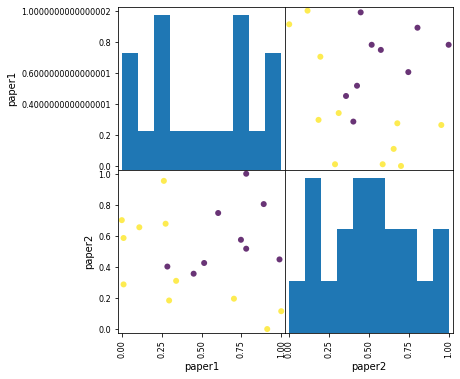

In [12]:
pd.plotting.scatter_matrix(sdata,c=df_target,figsize=(6,6),alpha=.8,marker="o",hist_kwds={"bins":10});

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
knn=KNeighborsClassifier(n_neighbors=5)

In [15]:
DT=DecisionTreeClassifier(max_depth=5,random_state=0)

In [16]:
RF=RandomForestClassifier(max_depth=5,random_state=0)

In [17]:
svm=SVC(C=1,random_state=0)

In [64]:
loR=LogisticRegression(C=100,random_state=2)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(a,df_target,random_state=0)

In [20]:
df_data.shape

(20, 2)

In [21]:
x_train.shape

(15, 2)

In [22]:
y_train.shape

(15,)

In [23]:
x_test.shape

(5, 2)

In [24]:
y_test.shape

(5,)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [27]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
svm.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [65]:
loR.fit(x_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Checking accuracy for TEST data

In [30]:
y_test_pred=knn.predict(x_test)
y_test_pred

array([1, 0, 0, 0, 0], dtype=int64)

In [31]:
knn.score(x_test,y_test)*100

60.0

In [32]:
DT.score(x_test,y_test)*100

100.0

In [33]:
RF.score(x_test,y_test)*100

100.0

In [34]:
svm.score(x_test,y_test)*100

100.0

In [66]:
loR.score(x_test,y_test)*100

60.0

In [36]:
np.mean(y_test_pred==y_test)*100

60.0

### Checking accuracy for TRAIN data

In [37]:
y_train_pred=knn.predict(x_train)

In [38]:
knn.score(x_train,y_train)*100

86.66666666666667

In [39]:
DT.score(x_train,y_train)*100

100.0

In [40]:
RF.score(x_train,y_train)*100

100.0

In [41]:
svm.score(x_train,y_train)*100

93.33333333333333

In [67]:
loR.score(x_train,y_train)*100

80.0

In [43]:
np.mean(y_train_pred==y_train)*100

86.66666666666667

In [44]:
from sklearn.externals import joblib

c:\software\python3.8\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [45]:
joblib.dump(knn,"F:\Python Prac\marks_model.pkl")

['F:\\Python Prac\\marks_model.pkl']

In [46]:
knn_from_joblib=joblib.load("F:\Python Prac\marks_model.pkl")

In [47]:
knn_from_joblib.predict(x_test)

array([1, 0, 0, 0, 0], dtype=int64)

In [48]:
knn_from_joblib.score(x_test,y_test)*100

60.0